# Importing required Functions and libraries

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import os
#To handle warnings 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn import metrics
from scipy import stats
from scipy.stats import norm, skew 



In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Reading and Understanding the data

In [3]:
# reading the dataset
DF_house = pd.read_csv("train.csv")

In [4]:
DF_house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
DF_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
DF_house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

# Exploratory Data Analysis(EDA)

In [7]:
#Dropping ID as that is unique for each row
DF_house=DF_house.drop(['Id'], axis = 1)

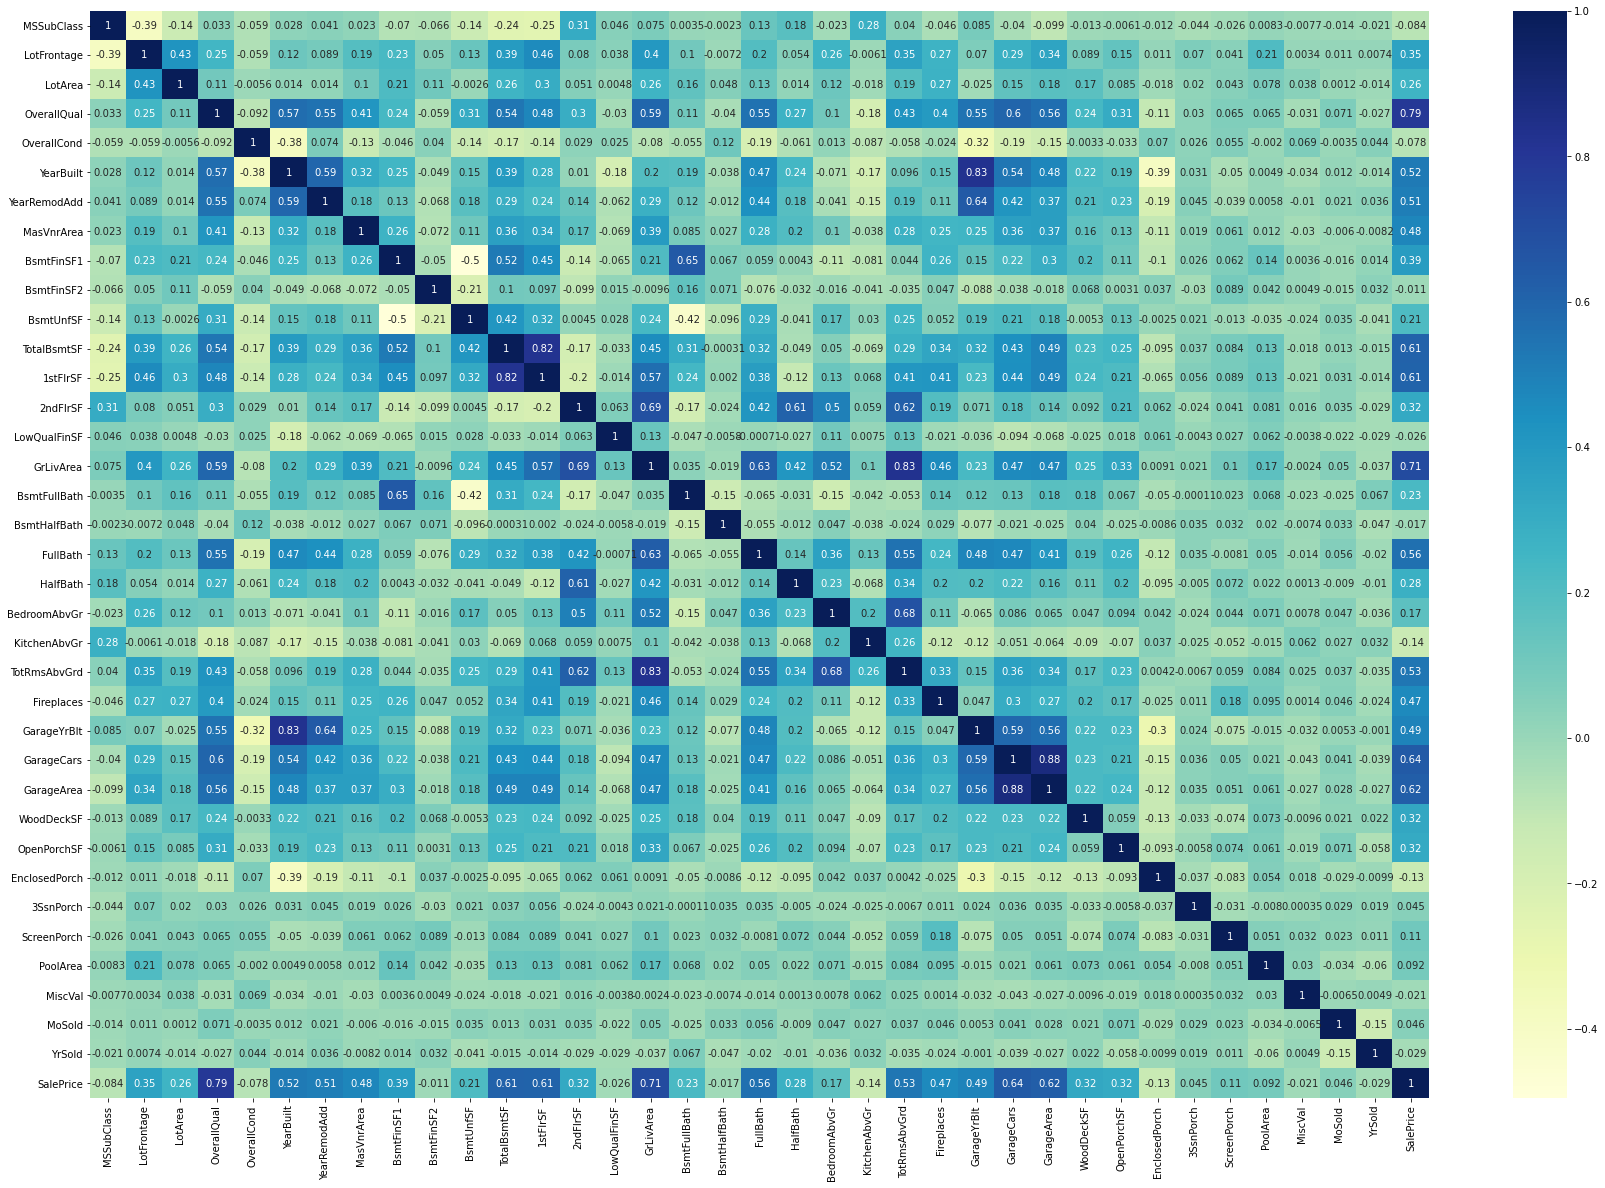

In [8]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(DF_house.corr(), cmap="YlGnBu", annot=True)
plt.show()


In [9]:
DF_house.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [10]:
highest_corr_features=DF_house.corr().index[abs(DF_house.corr()["SalePrice"])>0.5]
highest_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [11]:
DF_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

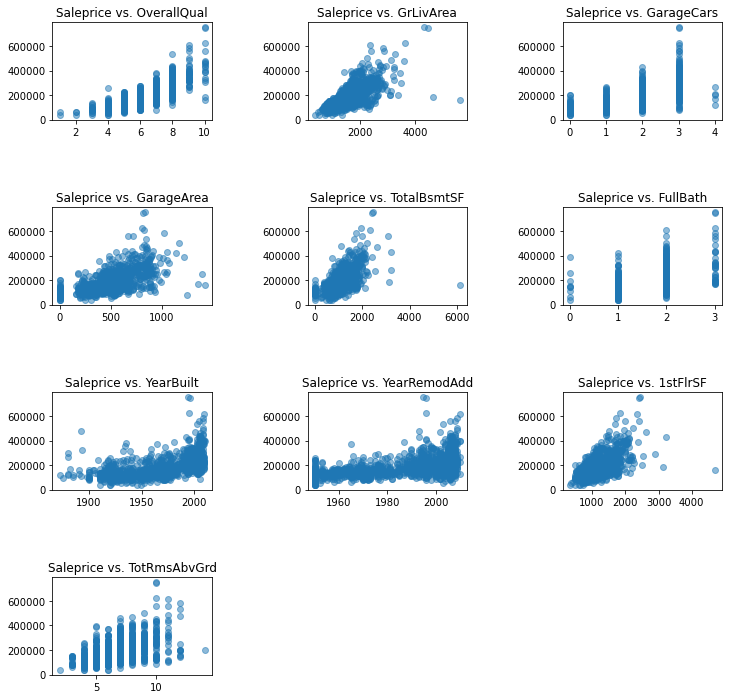

In [12]:
 #Scatter Plot of Saleprice with columns:  OverallQual,  GrLivArea, GarageArea, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd,,TotRmsAbvGrd,1stFlrSF,GarageCars     
var_ind = [16,45,60, 61,37,48,18,19,42,53,]
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.9, wspace = 0.6)
for i in range(1,11):
    a = plot.add_subplot(4,3 , i)
    a.scatter(x = DF_house.iloc[: , var_ind[i - 1]], y = DF_house.iloc[: , 79], alpha = 0.5)
    a.title.set_text('Saleprice vs. ' + DF_house.columns[var_ind[i - 1]])

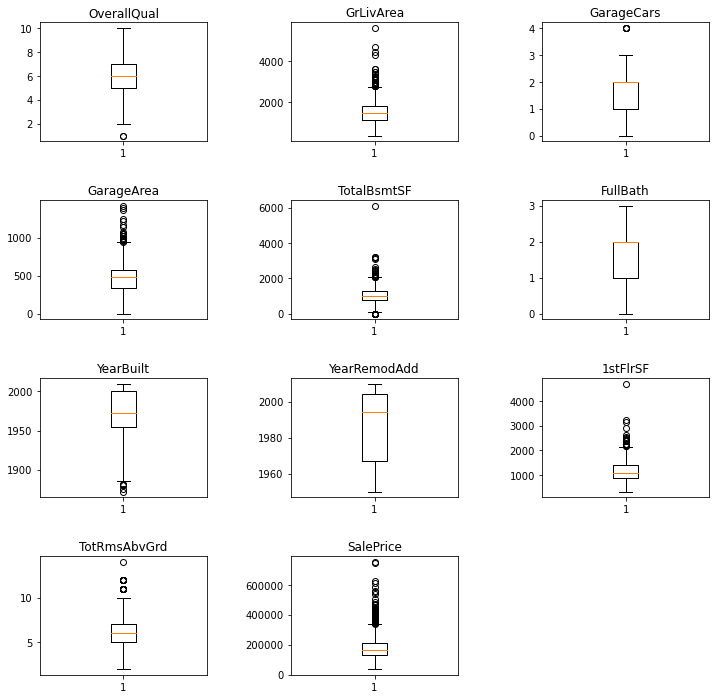

In [13]:
#boxplot of SalePrice, OverallQual,  GrLivArea, GarageArea, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd,,TotRmsAbvGrd,1stFlrSF,GarageCars 
l = [16,45,60, 61,37,48,18,19,42,53,79]
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 12):
    a = plot.add_subplot(4, 3, i)
    a.boxplot(DF_house.iloc[: , l[i - 1]])
    a.title.set_text(DF_house.columns[l [i - 1]])

In [14]:
#Let's see the outliers percentage in above column
for k, v in  DF_house.iloc[: , l].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(DF_house.iloc[: , l])[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column OverallQual outliers = 1.58%
Column GrLivArea outliers = 2.12%
Column GarageCars outliers = 0.34%
Column GarageArea outliers = 1.44%
Column TotalBsmtSF outliers = 4.18%
Column FullBath outliers = 0.00%
Column YearBuilt outliers = 0.62%
Column YearRemodAdd outliers = 0.00%
Column 1stFlrSF outliers = 1.37%
Column TotRmsAbvGrd outliers = 5.34%
Column SalePrice outliers = 4.18%


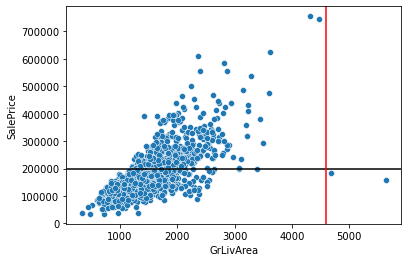

In [15]:
#outlier between saleprice and GrLivArea
sns.scatterplot(data=DF_house , x='GrLivArea',y='SalePrice')
plt.axhline(y=200000, color='black')
plt.axvline(x=4600, color='red')

In [16]:
DF_house_1 = DF_house[~((DF_house['GrLivArea']>4500)&(DF_house['SalePrice']<200000))]
print(np.shape(DF_house_1))

(1458, 80)


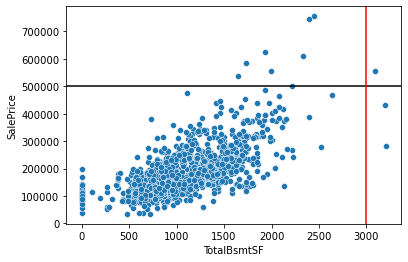

In [17]:
#outlier between saleprice and TotalBsmtSF
sns.scatterplot(data=DF_house_1 , x='TotalBsmtSF',y='SalePrice')
plt.axhline(y=500000, color='black')
plt.axvline(x=3000, color='red')

In [18]:
DF_house_1 = DF_house_1[~((DF_house_1['TotalBsmtSF']>3000)&(DF_house_1['SalePrice']<=500000))]
print(np.shape(DF_house_1))

(1456, 80)


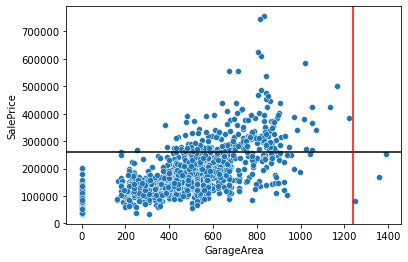

In [19]:
#outlier between saleprice and GarageArea
sns.scatterplot(data=DF_house_1 , x='GarageArea',y='SalePrice')
plt.axhline(y=260000, color='black')
plt.axvline(x=1240, color='red')

In [20]:
DF_house_1 = DF_house_1[~((DF_house_1['GarageArea']>1240)&(DF_house_1['SalePrice']<260000))]
print(np.shape(DF_house_1))

(1453, 80)


In [21]:
#Removing one of the high correlated from pairs checked using heatmap
DF_house_1.drop([ '1stFlrSF', 'TotRmsAbvGrd','GarageCars','GarageYrBlt'],  axis = 1, inplace = True)
DF_house_1.shape

(1453, 76)

# Handling Null Values

In [22]:
DF_house_1.isna().sum().sort_values(ascending=False)

PoolQC           1447
MiscFeature      1400
Alley            1362
Fence            1172
FireplaceQu       689
LotFrontage       257
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType2       37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
MSSubClass          0
KitchenQual         0
Functional          0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
BsmtFullBath        0
KitchenAbvGr        0
GarageArea          0
Fireplaces          0
LowQualFinSF        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
GrLivArea           0
Heating             0
2ndFlrSF            0
CentralAir

In [23]:
# Percentage of Null values
null_values=[(i,DF_house_1[i].isna().mean()*100) for i in DF_house_1]
null_df=pd.DataFrame(null_values,columns=['column_name','percentage'])
null_df

column_name  percentage
0      MSSubClass    0.000000
1        MSZoning    0.000000
2     LotFrontage   17.687543
3         LotArea    0.000000
4          Street    0.000000
5           Alley   93.737096
6        LotShape    0.000000
7     LandContour    0.000000
8       Utilities    0.000000
9       LotConfig    0.000000
10      LandSlope    0.000000
11   Neighborhood    0.000000
12     Condition1    0.000000
13     Condition2    0.000000
14       BldgType    0.000000
15     HouseStyle    0.000000
16    OverallQual    0.000000
17    OverallCond    0.000000
18      YearBuilt    0.000000
19   YearRemodAdd    0.000000
20      RoofStyle    0.000000
21       RoofMatl    0.000000
22    Exterior1st    0.000000
23    Exterior2nd    0.000000
24     MasVnrType    0.550585
25     MasVnrArea    0.550585
26      ExterQual    0.000000
27      ExterCond    0.000000
28     Foundation    0.000000
29       BsmtQual    2.546456
30       BsmtCond    2.546456
31   BsmtExposure    2.615279
32   BsmtFinType1    2.546456
33     BsmtFinSF1    0.000000
34   BsmtFinType2    2.546456
35     BsmtFinSF2    0.000000
36      BsmtUnfSF    0.000000
37    TotalBsmtSF    0.000000
38        Heating    0.000000
39      HeatingQC    0.000000
40     CentralAir    0.000000
41     Electrical    0.068823
42       2ndFlrSF    0.000000
43   LowQualFinSF    0.000000
44      GrLivArea    0.000000
45   BsmtFullBath    0.000000
46   BsmtHalfBath    0.000000
47       FullBath    0.000000
48       HalfBath    0.000000
49   BedroomAbvGr    0.000000
50   KitchenAbvGr    0.000000
51    KitchenQual    0.000000
52     Functional    0.000000
53     Fireplaces    0.000000
54    FireplaceQu   47.419133
55     GarageType    5.574673
56   GarageFinish    5.574673
57     GarageArea    0.000000
58     GarageQual    5.574673
59     GarageCond    5.574673
60     PavedDrive    0.000000
61     WoodDeckSF    0.000000
62    OpenPorchSF    0.000000
63  EnclosedPorch    0.000000
64      3SsnPorch    0.000000
65    ScreenPorch    0.000000
66       PoolArea    0.000000
67         PoolQC   99.587061
68          Fence   80.660702
69    MiscFeature   96.352374
70        MiscVal    0.000000
71         MoSold    0.000000
72         YrSold    0.000000
73       SaleType    0.000000
74  SaleCondition    0.000000
75      SalePrice    0.000000

In [24]:
null_df[null_df['percentage']>40].sort_values('percentage')

column_name  percentage
54  FireplaceQu   47.419133
68        Fence   80.660702
5         Alley   93.737096
69  MiscFeature   96.352374
67       PoolQC   99.587061

In [25]:
#Dropping 'PoolQC','Fence','MiscFeature' because they have more than 40% of null values and have correlation less than 0.5 with target
DF_house_2=DF_house_1.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'], axis = 1)

In [26]:
DF_house_2.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          Y      SBrkr       854             0       1710             1   
1          Y      SBrkr         0             0       1262             0   
2          Y      SBrkr       866             0       1786             1   
3          Y      SBrkr       756             0       1717             1   
4          Y      SBrkr      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

  Functional  Fireplaces GarageType GarageFinish  GarageArea GarageQual  \
0        Typ           0     Attchd          RFn         548         TA   
1        Typ           1     Attchd          RFn         460         TA   
2        Typ           1     Attchd          RFn         608         TA   
3        Typ           

In [27]:
DF_house_numerical=DF_house_2.select_dtypes(exclude=['object'])
DF_house_categorical=DF_house_2.select_dtypes(include=['object'])

In [28]:
for feature in DF_house_numerical.columns:
    DF_house_2[feature]=DF_house_2[feature].fillna(DF_house_2[feature].mean())

In [29]:
for feature in DF_house_categorical.columns:
    DF_house_2[feature]=DF_house_2[feature].fillna(DF_house_2[feature].mode()[0])

In [30]:
DF_house_2.isna().sum().sort_values(ascending=False)

MSSubClass       0
BsmtHalfBath     0
Functional       0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtFullBath     0
GarageType       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
Electrical       0
CentralAir       0
HeatingQC        0
Fireplaces       0
GarageFinish     0
TotalBsmtSF      0
ScreenPorch      0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
3SsnPorch        0
GarageArea       0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
Heating          0
BsmtUnfSF        0
MSZoning         0
LandSlope        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
YearBuilt        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
LotFrontage      0
OverallCond 

In [31]:
#Dropping columns which are

# Preparing the data for modeling
- Dummy Variables for categorical columns
- Scaling numerical variables

In [32]:
DF_house_2=pd.get_dummies(DF_house_2,drop_first=True)
DF_house_2.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0         1             3             1           0         548           0   
1         0             3             1           1         460         298   
2         1             3             1           1         608           0   
3         0             3             1           1         642           0   
4         1             4             1           1         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0       2    2008     208500            0            0            1   
1       5    2007     181500            0            0            1   
2       9    2008     223500            0            0            1   
3       2    2006     140000            0            0            1   
4      12    2008     250000            0            0            1   

   MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            0            1             0             0             1   
1            0            1             0             0             1   
2            0            1             0             0             0   
3            0            1             0             0             0   
4            0            1             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   

In [33]:
# Checking co-related features
corr = DF_house_2.corr()
corr

MSSubClass   LotFrontage   LotArea  OverallQual  \
MSSubClass               1.000000 -3.750123e-01 -0.147155     0.037642   
LotFrontage             -0.375012  1.000000e+00  0.275801     0.222163   
LotArea                 -0.147155  2.758009e-01  1.000000     0.095065   
OverallQual              0.037642  2.221626e-01  0.095065     1.000000   
OverallCond             -0.058113 -4.753025e-02  0.000365    -0.093203   
YearBuilt                0.029911  1.118355e-01  0.008325     0.569823   
YearRemodAdd             0.042552  7.744280e-02  0.008892     0.547851   
MasVnrArea               0.023044  1.515680e-01  0.084419     0.401862   
BsmtFinSF1              -0.077650  1.369735e-01  0.174129     0.222174   
BsmtFinSF2              -0.064313  4.762579e-02  0.115465    -0.061504   
BsmtUnfSF               -0.134762  1.251740e-01 -0.003082     0.304944   
TotalBsmtSF             -0.253081  2.991163e-01  0.227275     0.539978   
2ndFlrSF                 0.310291  6.245170e-02  0.043054     0.291896   
LowQualFinSF             0.046681  4.047521e-02  0.005835    -0.030234   
GrLivArea                0.079290  3.261197e-01  0.234121     0.588843   
BsmtFullBath             0.001385  7.133441e-02  0.146390     0.103225   
BsmtHalfBath            -0.002336 -3.798364e-03  0.050749    -0.039553   
FullBath                 0.137121  1.797952e-01  0.121908     0.546145   
HalfBath                 0.179561  3.875974e-02  0.008894     0.270350   
BedroomAbvGr            -0.023371  2.490756e-01  0.120737     0.099056   
KitchenAbvGr             0.282982 -3.053756e-03 -0.016323    -0.184870   
Fireplaces              -0.046885  2.181163e-01  0.261271     0.391996   
GarageArea              -0.105640  2.979719e-01  0.157822     0.574105   
WoodDeckSF              -0.019190  7.372176e-02  0.165668     0.240607   
OpenPorchSF             -0.005091  1.061621e-01  0.063157     0.296968   
EnclosedPorch           -0.009284  1.522002e-02 -0.016539    -0.118951   
3SsnPorch               -0.044013  6.686260e-02  0.021683     0.031163   
ScreenPorch             -0.026140  4.309143e-02  0.046029     0.066679   
PoolArea                 0.008120  1.008614e-01  0.036715     0.044979   
MiscVal                 -0.007223  3.936738e-05  0.038778    -0.029620   
MoSold                  -0.009818  2.154133e-02  0.007287     0.071213   
YrSold                  -0.019401  5.595788e-03 -0.012924    -0.028263   
SalePrice               -0.082025  3.560384e-01  0.270256     0.795982   
MSZoning_FV              0.172106 -9.237591e-02 -0.083401     0.174505   
MSZoning_RH              0.058546 -4.405233e-02 -0.032730    -0.064878   
MSZoning_RL             -0.346565  3.387625e-01  0.204562     0.122521   
MSZoning_RM              0.279087 -3.167365e-01 -0.172969    -0.195816   
Street_Pave             -0.034953 -1.573097e-02 -0.210678     0.038272   
LotShape_IR2            -0.019473  3.487428e-02  0.229957     0.079250   
LotShape_IR3            -0.033684  9.923151e-02  0.227515     0.020188   
LotShape_Reg             0.120615 -1.604930e-01 -0.213847    -0.193016   
LandContour_HLS         -0.010718  6.898933e-02  0.092503     0.105450   
LandContour_Low         -0.044710  3.932652e-02  0.362889    -0.030469   
LandContour_Lvl          0.017134 -5.820436e-02 -0.240479     0.021040   
Utilities_NoSeWa        -0.022942  1.595611e-17  0.010490    -0.001790   
LotConfig_CulDSac       -0.044631 -5.877177e-02  0.184318     0.077901   
LotConfig_FR2            0.015290 -3.790439e-02 -0.000707     0.013044   
LotConfig_FR3            0.044324  2.577978e-03 -0.009225     0.044283   
LotConfig_Inside         0.068333 -1.453934e-01 -0.131790    -0.043459   
LandSlope_Mod           -0.029511  7.669909e-02  0.089034    -0.043978   
LandSlope_Sev           -0.017257  2.414279e-02  0.549303    -0.043771   
Neighborhood_Blueste     0.090698 -8.078489e-02 -0.033200    -0.002533   
Neighborhood_BrDale      0.257780 -2.418458e-01 -0.092475    -0.031232   
Neighborhood_BrkSide    -0.

In [34]:
DF_house_3=DF_house_2.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces',
        'WoodDeckSF',
        'MSZoning_FV','MSZoning_RL','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe',
        'HouseStyle_1Story','RoofStyle_Gable','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtCond_Gd',
        'BsmtCond_Po','Heating_GasA',
        'KitchenQual_Gd','GarageType_Attchd','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_Po','GarageQual_TA','GarageCond_Po',
        'GarageCond_TA','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','Foundation_PConc',],
         axis=1)

In [35]:
# Test Train split
np.random.seed(0)
housing_train,housing_test = train_test_split(DF_house_3, train_size=0.7,random_state=100)


In [36]:
DF_house_3.shape

(1453, 173)

In [37]:
print(housing_train.shape)
print(housing_test.shape)

(1017, 173)
(436, 173)


In [38]:
y_train=housing_train.pop('SalePrice')
X_train=housing_train

In [39]:
y_test=housing_test.pop('SalePrice')
X_test=housing_test

In [40]:
scaler=MinMaxScaler()
numeric_features = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_features]=scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features]=scaler.transform(X_test[numeric_features])
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallCond  LowQualFinSF  \
852     0.323529     0.109589  0.027241     0.428571      0.000000   
25      0.000000     0.304795  0.060436     0.428571      0.000000   
88      0.176471     0.287671  0.033513     0.000000      0.996117   
1214    0.382353     0.164384  0.041623     0.428571      0.000000   
1165    0.000000     0.198630  0.038519     0.428571      0.000000   

      BsmtFullBath  BsmtHalfBath  GarageArea  OpenPorchSF  EnclosedPorch  \
852       0.000000           0.0    0.211640     0.000000       0.000000   
25        0.000000           0.0    0.784832     0.102377       0.000000   
88        0.000000           0.0    0.000000     0.000000       0.282609   
1214      0.333333           0.0    0.264550     0.131627       0.000000   
1165      0.000000           0.0    0.567901     0.208410       0.000000   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
852         0.0       0.2625       0.0      0.0  0.636364    0.25   
25          0.0       0.0000       0.0      0.0  0.545455    0.75   
88          0.0       0.0000       0.0      0.0  0.818182    0.75   
1214        0.0       0.0000       0.0      0.0  0.363636    0.00   
1165        0.0       0.0000       0.0      0.0  0.727273    0.75   

      MSZoning_RH  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
852           0.0          0.0          1.0           0.0           0.0   
25            0.0          0.0          1.0           0.0           0.0   
88            0.0          0.0          1.0           0.0           0.0   
1214          0.0          0.0          1.0           0.0           0.0   
1165          0.0          0.0          1.0           0.0           0.0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
852            1.0              0.0              0.0              1.0   
25             1.0              0.0              0.0              1.0   
88             0.0              0.0              0.0              1.0   
1214           0.0              0.0              0.0              1.0   
1165           0.0              0.0              0.0              1.0   

      Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
852                0.0                0.0            0.0            0.0   
25                 0.0                0.0            0.0            0.0   
88                 0.0                0.0            0.0            0.0   
1214               0.0                0.0            0.0            0.0   
1165               0.0                0.0            0.0            0.0   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
852                1.0            0.0            0.0                   0.0   
25                 0.0            0.0            0.0                   0.0   
88                 0.0            0.0            0.0                   0.0   
1214               1.0            0.0            0.0                   0.0   
1165               1.0            0.0            0.0                   0.0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
852                   0.0                   0.0                   0.0   
25                    0.0                   0.0                   0.0   
88                    0.0                   0.0                   0.0   
1214                  0.0                   0.0                   0.0   
1165                  0.0                   0.0                   0.0   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
852                    0.0                   1.0                   0.0   
25                     0.0                   0.0                   0.0   
88                     0.0                   0.0                   0.0   
1214                   0.0                   0.0                   0.0   
1165                   0.0                   0.0                   0.0   

      Neighborhood_

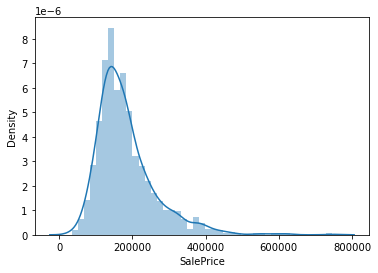

In [41]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

In [42]:
from sklearn.preprocessing import PowerTransformer

In [43]:
#Transforming the Target as it is left skweed
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

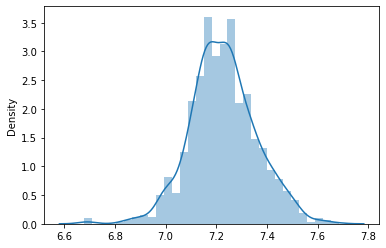

In [44]:
sns.distplot(y_train)
plt.show()

In [45]:
#Statistical info
X_train.describe()

MSSubClass  LotFrontage      LotArea  OverallCond  LowQualFinSF  \
count  1017.000000  1017.000000  1017.000000  1017.000000   1017.000000   
mean      0.222425     0.167198     0.041847     0.513696      0.008615   
std       0.251603     0.074928     0.044573     0.158640      0.079786   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.133562     0.028605     0.428571      0.000000   
50%       0.176471     0.166846     0.038103     0.428571      0.000000   
75%       0.294118     0.198630     0.047475     0.571429      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       BsmtFullBath  BsmtHalfBath   GarageArea  OpenPorchSF  EnclosedPorch  \
count   1017.000000   1017.000000  1017.000000  1017.000000    1017.000000   
mean       0.142904      0.024582     0.415555     0.085979       0.040397   
std        0.174075      0.110410     0.180052     0.123072       0.112920   
min        0.000000      0.000000     0.000000     0.000000       0.000000   
25%        0.000000      0.000000     0.298060     0.000000       0.000000   
50%        0.000000      0.000000     0.423280     0.043876       0.000000   
75%        0.333333      0.000000     0.507937     0.127971       0.000000   
max        1.000000      1.000000     1.000000     1.000000       1.000000   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal       MoSold  \
count  1017.000000  1017.000000  1017.000000  1017.000000  1017.000000   
mean      0.008600     0.029964     0.004036     0.003120     0.473049   
std       0.064991     0.110628     0.057937     0.033978     0.247898   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.272727   
50%       0.000000     0.000000     0.000000     0.000000     0.454545   
75%       0.000000     0.000000     0.000000     0.000000     0.636364   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            YrSold  MSZoning_RH  MSZoning_RM  Street_Pave  LotShape_IR2  \
count  1017.000000  1017.000000  1017.000000  1017.000000   1017.000000   
mean      0.458210     0.009833     0.155359     0.996067      0.024582   
std       0.336215     0.098721     0.362425     0.062622      0.154924   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.250000     0.000000     0.000000     1.000000      0.000000   
50%       0.500000     0.000000     0.000000     1.000000      0.000000   
75%       0.750000     0.000000     0.000000     1.000000      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
count   1017.000000   1017.000000      1017.000000      1017.000000   
mean       0.007866      0.633235         0.038348         0.017699   
std        0.088386      0.482159         0.192130         0.131920   
min        0.000000      0.000000         0.000000         0.000000   
25%        0.000000      0.000000         0.000000         0.000000   
50%        0.000000      1.000000         0.000000         0.000000   
75%        0.000000      1.000000         0.000000         0.000000   
max        1.000000      1.000000         1.000000         1.000000   

       LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
count      1017.000000       1017.000000        1017.000000    1017.000000   
mean          0.902655          0.000983           0.062930       0.029499   
std           0.296573          0.031357           0.242957       0.169282   
min           0.000000          0.000000           0.000000       0.000000   
25%           1.000000          0.000000           0.000000       0.000000   
50%           1.000000          0.000000           0.000000       0.000000   
75%           1.000000          0.000000           0.000000       0.000000   
max           1.000000

# Recursive feature elimination

In [46]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [47]:
#Print the intercept and coefficients 
print(lm.intercept_)
print(lm.coef_)

[6.98668576]
[[ 9.98454172e-02  9.33883477e-02  3.89523083e-01  7.64125826e-02
   2.94619821e-02  4.77036844e-02 -1.77173202e-02  1.56839999e-01
   4.68300948e-02  1.49605842e-02  2.43267949e-02  5.09349880e-02
   1.20731711e-01 -2.63744495e-01 -2.57571321e-03 -3.79339332e-03
  -1.78357602e-02  2.62501053e-02  3.85533803e-02 -2.61206899e-03
  -5.67891996e-03 -6.47680430e-03  7.19931229e-03 -2.18793095e-02
   1.09539203e-02 -8.27266103e-02  1.75607495e-02 -1.42137571e-02
  -3.80292333e-02  4.58798234e-03  4.74336094e-03 -2.27708620e-01
  -1.03862595e-01 -9.10569142e-02 -6.95583713e-02 -5.44087464e-02
  -5.61384015e-02  4.87551776e-05 -7.44448876e-02 -4.73377723e-02
  -1.37384564e-01 -1.71456543e-01 -7.24134403e-02 -6.42386412e-02
  -4.72714464e-02  1.00802938e-02  2.55760885e-02 -1.17148511e-01
  -1.80102441e-02 -7.01837195e-02 -3.51187310e-02 -1.51964015e-02
   4.33827368e-02 -3.51884460e-02 -2.15123157e-02  1.85855778e-02
   1.46028764e-02  5.97903640e-02 -2.95316207e-02  1.15980288e-

In [48]:
# Importing RFE
from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm, 90)
rfe.fit(X_train, y_train)  
#True or False 
print(rfe.support_)          
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True False False  True
  True  True False False  True  True  True False False False False  True
 False  True False False  True False False  True  True  True  True  True
  True False  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True False False  True  True False
 False False False  True  True  True  True  True False  True  True False
  True  True False  True  True False False  True  True  True  True False
 False False  True  True  True  True False  True False  True  True False
  True  True False False False False False False  True  True False  True
  True  True False  True False  True False False  True False  True False
 False False False False False False False  True False False False  True
  True  True  True False False  True False  True False False False False
  True  True  True False False False False False False False  True  True
 False False False False False False  True  True  T

In [49]:
#Displaying the features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'LowQualFinSF',
       'BsmtFullBath', 'GarageArea', 'OpenPorchSF', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MSZoning_RH', 'MSZoning_RM', 'Street_Pave',
       'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn',
       'BldgType_2fmCon', 'B

In [50]:
# Features that are not included by RFE
X_train.columns[~rfe.support_]

Index(['BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'MoSold', 'YrSold',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_Inside', 'LandSlope_Mod', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Norm', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'HouseStyle_2Story', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_ImStucc',
       'Exterior2nd_Wd Shng', 'ExterCond_Fa', 'ExterCond_TA',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtCond_TA', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'B

In [51]:
# Build the first model with features selected by RFE 
X_train_rfe_one =X_train[col]

In [52]:
import statsmodels.api as sm  
X_train_rfe_one = sm.add_constant(X_train_rfe_one) 
X_train_rfe_one.head()

const  MSSubClass  LotFrontage   LotArea  OverallCond  LowQualFinSF  \
852     1.0    0.323529     0.109589  0.027241     0.428571      0.000000   
25      1.0    0.000000     0.304795  0.060436     0.428571      0.000000   
88      1.0    0.176471     0.287671  0.033513     0.000000      0.996117   
1214    1.0    0.382353     0.164384  0.041623     0.428571      0.000000   
1165    1.0    0.000000     0.198630  0.038519     0.428571      0.000000   

      BsmtFullBath  GarageArea  OpenPorchSF  ScreenPorch  PoolArea  MiscVal  \
852       0.000000    0.211640     0.000000       0.2625       0.0      0.0   
25        0.000000    0.784832     0.102377       0.0000       0.0      0.0   
88        0.000000    0.000000     0.000000       0.0000       0.0      0.0   
1214      0.333333    0.264550     0.131627       0.0000       0.0      0.0   
1165      0.000000    0.567901     0.208410       0.0000       0.0      0.0   

      MSZoning_RH  MSZoning_RM  Street_Pave  LandContour_Low  \
852           0.0          0.0          1.0              0.0   
25            0.0          0.0          1.0              0.0   
88            0.0          0.0          1.0              0.0   
1214          0.0          0.0          1.0              0.0   
1165          0.0          0.0          1.0              0.0   

      Utilities_NoSeWa  LotConfig_FR3  LandSlope_Sev  Neighborhood_Blueste  \
852                0.0            0.0            0.0                   0.0   
25                 0.0            0.0            0.0                   0.0   
88                 0.0            0.0            0.0                   0.0   
1214               0.0            0.0            0.0                   0.0   
1165               0.0            0.0            0.0                   0.0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
852                   0.0                   0.0                   0.0   
25                    0.0                   0.0                   0.0   
88                    0.0                   0.0                   0.0   
1214                  0.0                   0.0                   0.0   
1165                  0.0                   0.0                   0.0   

      Neighborhood_CollgCr  Neighborhood_Edwards  Neighborhood_Gilbert  \
852                    0.0                   0.0                   0.0   
25                     0.0                   0.0                   0.0   
88                     0.0                   0.0                   0.0   
1214                   0.0                   0.0                   0.0   
1165                   0.0                   0.0                   0.0   

      Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
852                   0.0                   0.0                   0.0   
25                    0.0                   0.0                   0.0   
88                    1.0                   0.0                   0.0   
1214                  0.0                   0.0                   0.0   
1165                  0.0                   0.0                   0.0   

      Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NridgHt  \
852                  0.0                  0.0                   0.0   
25                   0.0                  0.0                   1.0   
88                   0.0                  0.0                   0.0   
1214                 1.0                  0.0                   0.0   
1165                 0.0                  0.0                   1.0   

      Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
852                    0.0                 0.0                  0.0   
25                     0.0                 0.0                  0.0   
88                     0.0                 0.0                  0.0   
1214                   0.0                 0.0                  0.0   
1165                   0.0                 0.0                  0.0   

      Neighborhood_SawyerW  Neighborh

In [53]:
lm1 = sm.OLS(y_train, X_train_rfe_one).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     67.45
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:48:16   Log-Likelihood:                 1617.8
No. Observations:                1017   AIC:                            -3066.
Df Residuals:                     932   BIC:                            -2647.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.01

In [86]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 91 is different from 172)

# Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [83]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [82]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 3.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=3.0)

In [60]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8644892030938196
0.7737918755111244
2.371621706151119
1.574257355952378
0.0023319780788113266
0.0036106820090650873


## Lasso Regression

In [61]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [63]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [64]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8639844953538502
0.7783431741322757
32577.284223711125
5640.669805220838
0.002340663492908845
0.0035380352282016426


In [65]:
from sklearn import linear_model, metrics

In [66]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.787590e-01          0.864489          0.863984
1   R2 Score (Test)      -9.864883e+23          0.773792          0.778343
2       RSS (Train)       2.121881e+00          2.371622      32577.284224
3        RSS (Test)       6.865299e+24          1.574257       5640.669805
4       MSE (Train)       4.567726e-02          0.048291          0.048380
5        MSE (Test)       1.254835e+11          0.060089          0.059481

## Checking coefficients

In [67]:
ridge_coeff=ridge.coef_

In [68]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coeff),columns=housing_train.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
GarageArea                      0.150654
HouseStyle_2.5Unf               0.072596
LotFrontage                     0.070946
OverallCond                     0.063760
Neighborhood_StoneBr            0.061829
PoolArea                        0.061798
CentralAir_Y                    0.061037
Exterior1st_BrkFace             0.058122
Neighborhood_NridgHt            0.056510
LotArea                         0.054167
Neighborhood_NoRidge            0.050674
OpenPorchSF                     0.048103
Neighborhood_Crawfor            0.043980
ScreenPorch                     0.041494
HouseStyle_2.5Fin               0.041411
BsmtFullBath                    0.041083
Heating_GasW                    0.036375
Condition1_PosN                 0.036175
BsmtExposure_Gd                 0.034447
LowQualFinSF                    0.034232

In [69]:
Lasso_coeff=lasso.coef_

In [70]:
#Displaing the co-efficients of the model
Lasso_coeff2 = pd.DataFrame(np.atleast_2d(Lasso_coeff),columns=housing_train.columns)
Lasso_coeff2 = Lasso_coeff2.T
Lasso_coeff2.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
Lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
Lasso_coeff2.head(20)

Lasso Co-Efficient
GarageArea                      0.172779
LotArea                         0.097590
HouseStyle_2.5Unf               0.095698
LotFrontage                     0.095537
PoolArea                        0.084121
Neighborhood_StoneBr            0.072531
OverallCond                     0.070842
CentralAir_Y                    0.063151
Neighborhood_NridgHt            0.060600
Exterior1st_BrkFace             0.057994
Neighborhood_NoRidge            0.054300
OpenPorchSF                     0.049891
Neighborhood_Crawfor            0.048647
ScreenPorch                     0.042528
BsmtFullBath                    0.041932
Condition1_PosN                 0.040212
HouseStyle_2.5Fin               0.037119
BsmtExposure_Gd                 0.035170
LowQualFinSF                    0.034524
Exterior1st_CemntBd             0.034010

# Subjective questions

Question1: Doubling the alpha in Ridge and Lasso

In [71]:
#Actual value of alpha is 3.o so doubling it to 6.0
alpha = 6.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=6.0)

In [72]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8549994374730953
0.77098663350158
2.5377054031422777
1.5937799654021063
0.002495285548812466
0.003655458636243363


In [73]:
#Fitting lasso model for alpha = 0.0002 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [74]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8539167402217968
0.7745528477320931
32049.1164626647
5532.908648333705
0.0025139174682879697
0.003598535545652871


Question 3:After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now

In [75]:
X_train_new = X_train.drop(['GarageArea','LotArea','HouseStyle_2.5Unf','LotFrontage','PoolArea'],axis=1)
X_test_new = X_test.drop(['GarageArea','LotArea','HouseStyle_2.5Unf','LotFrontage','PoolArea'],axis=1)
X_test_new.head()

MSSubClass  OverallCond  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
985     1.000000     0.428571           0.0      0.333333           0.0   
1184    0.000000     0.285714           0.0      0.333333           0.0   
623     0.823529     0.428571           0.0      0.000000           0.0   
377     0.235294     0.428571           0.0      0.000000           0.0   
1167    0.235294     0.428571           0.0      0.333333           0.0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal    MoSold  \
985      0.087751            0.0        0.0     0.000000      0.0  0.636364   
1184     0.480804            0.0        0.0     0.547917      0.0  0.363636   
623      0.058501            0.0        0.0     0.000000      0.0  0.454545   
377      0.391225            0.0        0.0     0.000000      0.0  1.000000   
1167     0.069470            0.0        0.0     0.000000      0.0  0.090909   

      YrSold  MSZoning_RH  MSZoning_RM  Street_Pave  LotShape_IR2  \
985     0.50          0.0          0.0          1.0           0.0   
1184    0.25          0.0          0.0          0.0           0.0   
623     0.25          0.0          0.0          1.0           0.0   
377     0.25          0.0          0.0          1.0           0.0   
1167    0.00          0.0          0.0          1.0           0.0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
985            0.0           1.0              0.0              0.0   
1184           0.0           1.0              0.0              0.0   
623            0.0           1.0              0.0              0.0   
377            0.0           0.0              0.0              0.0   
1167           0.0           0.0              0.0              0.0   

      LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
985               1.0               0.0                0.0            0.0   
1184              1.0               0.0                0.0            0.0   
623               1.0               0.0                0.0            0.0   
377               1.0               0.0                0.0            0.0   
1167              1.0               0.0                0.0            0.0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
985             0.0               1.0            0.0            0.0   
1184            0.0               1.0            1.0            0.0   
623             0.0               1.0            0.0            0.0   
377             0.0               0.0            0.0            0.0   
1167            0.0               1.0            0.0            0.0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
985                    0.0                  0.0                   0.0   
1184                   0.0                  0.0                   0.0   
623                    0.0                  0.0                   0.0   
377                    0.0                  0.0                   0.0   
1167                   0.0                  0.0                   0.0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
985                    0.0                   0.0                   0.0   
1184                   0.0                   0.0                   0.0   
623                    0.0                   0.0                   0.0   
377                    0.0                   0.0                   0.0   
1167                   0.0                   0.0                   0.0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
985                    1.0                   0.0                  0.0   
1184                   0.0                   0.0                  0.0   
623                    0.0                   0.0                  0.0   
377                    0.0                   0.0                  0.0   
1167                   0.0                   1.0                  0.0   

      Neighborhood_MeadowV  Nei

In [76]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [78]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso_2 = Lasso(alpha=alpha)
        
lasso_2.fit(X_train_new, y_train) 

Lasso(alpha=0.0001)

In [79]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_2.predict(X_train_new)
y_pred_test = lasso_2.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8332197222362061
0.7365669556382888
31987.852325781932
5531.167765221818
0.0028700882926140717
0.004204857610747981


In [80]:
Lasso_coeff=lasso_2.coef_

In [81]:
#Displaing the co-efficients of the model
Lasso_coeff2 = pd.DataFrame(np.atleast_2d(Lasso_coeff),columns=X_train_new.columns)
Lasso_coeff2 = Lasso_coeff2.T
Lasso_coeff2.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
Lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
Lasso_coeff2.head(5)

Lasso Co-Efficient
Condition2_PosA                 0.138167
Neighborhood_NridgHt            0.088114
Neighborhood_NoRidge            0.081961
Neighborhood_StoneBr            0.078048
Heating_GasW                    0.066949